In [1]:
from shapely.geometry import Point, Polygon
from shapely.geometry import shape, GeometryCollection
import shapely.ops
import pandas as pd
import numpy as np
import json

In [2]:
# with open('locations_FINAL_FeaturesToJS.json') as g:
#     point_features = json.load(g)['features']

In [3]:
point_df = pd.read_csv('loc_to_geodetic.csv')


In [38]:
shape_points = [] 

for i in range(len(point_df['Lat'].tolist())):
    x = point_df['Long'][i]
    y = point_df['Lat'][i]
    tup = (x,y)
    shape_points.append(Point(tup))

In [39]:
shape_points

In [40]:
point_df["Coordinates"] = shape_points
point_df

City/Region        Lat       Long       Notes  \
0                   Actium  38.920000  20.800000         NaN   
1              Alexandrium        NaN        NaN         NaN   
2             Allobrogibus        NaN        NaN         NaN   
3                   Alyzia  38.713373  20.951657         NaN   
4                 Arpinati        NaN        NaN         NaN   
5                   Astura  41.408855  12.765272         NaN   
6                   Athens  37.980000  23.730000         NaN   
7   Attici Ficuleano house        NaN        NaN         NaN   
8               Brindisium  40.638663  17.942912         NaN   
9               Brundisium  40.638663  17.942912         NaN   
10                 Caesars        NaN        NaN         NaN   
11                Campania  41.250000  14.250000    -- Cumae   
12                   Capua  41.086092  14.250207         NaN   
13                 Cilicia  38.250000  35.750000         NaN   
14                 Corcyra  39.606285  19.915580         NaN   
15                 Corduba  37.884683  -4.779171         NaN   
16                 Cumanum  40.500000  14.300000         NaN   
17                  Cyprum  35.100000  33.220000  -- Nicosia   
18                 Dertona  44.897171   8.865452         NaN   
19             Dyrrhachium  41.314409  19.447355         NaN   
20                Eporedia  45.466604   7.875942         NaN   
21                 Formium        NaN        NaN         NaN   
22                  Gallia        NaN        NaN         NaN   
23                Hispania        NaN        NaN         NaN   
24                 Iconium  37.872202  32.492331         NaN   
25              Intimilium  43.470000   7.360000         NaN   
26                Lanuvium  41.674703  12.697593         NaN   
27                Laterium  41.650000  13.600000         NaN   
28                  Latium  41.530000  12.300000     -- Rome   
29                Laudicea  37.500000  29.060000         NaN   
30                 Lepidus        NaN        NaN         NaN   
31                   Maium        NaN        NaN         NaN   
32               Menturnis  41.242193  13.768467         NaN   
33             Mopsuhestia  36.570000  35.370000         NaN   
34                Mytilens  39.600000  26.330000         NaN   
35                  Narona  43.063722  17.613419         NaN   
36               Neapolium  40.500000  14.150000         NaN   
37                   Parma  44.801507  10.327967         NaN   
38                   Patra  38.248795  21.734916         NaN   
39                   Perga  36.570000  30.510000         NaN   
40             Pindenessus  36.750000  36.330000         NaN   
41             Pindenissus  36.750000  36.330000         NaN   
42               Pollentia  44.686768   7.895976         NaN   
43         Pompeiano house        NaN        NaN         NaN   
44               Pomptinum        NaN        NaN         NaN   
45                   Ponte        NaN        NaN         NaN   
46                 Pyramus        NaN        NaN         NaN   
47                  Regium  38.110708  15.647027         NaN   
48                 Rhodium  36.100000  27.560000         NaN   
49                    Roma  41.530000  12.300000         NaN   
50                 Sicilia  37.750000  13.250000         NaN   
51                   Sidae  38.900000  22.530000         NaN   
52                   Syria  37.500000  37.500000         NaN   
53                Tadolics        NaN        NaN         NaN   
54                 Tarsium        NaN        NaN         NaN   
55            Thessalonica  40.634097  22.951647         NaN   
56              Tusculanum  36.920000  34.900000         NaN   
57                   Velia  40.160744  15.155092         NaN   
58                Vercells        NaN        NaN         NaN   
59                Voconium        NaN        NaN         NaN   

                            Coordinates  
0                    POINT (20.8 38.92)  
1                       PO

In [7]:
# with open('romanemp_json.json') as f:
#     features = json.load(f)['features']

In [8]:
poly_part1 = Polygon(features[0]['geometry']['rings'][0])
poly_part2 = Polygon(features[0]['geometry']['rings'][1])
poly_part = shapely.ops.cascaded_union([poly_part1, poly_part2])

NameError: name 'features' is not defined

In [9]:
poly_list = []

for b in range(len(features)):
#     coord_list = []
    i = shapely.ops.cascaded_union([Polygon(x) for x in features[b]['geometry']['rings']])
    poly_list.append(i)

NameError: name 'features' is not defined

In [10]:
len(poly_list)

0

In [11]:
with open('Romanum_Admin_FINAL.geojson') as f:
    poly_features = json.load(f)['features']

In [12]:
poly_features

[{'type': 'Feature',
  'id': 1,
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[35.511749268137535, 23.60455512958421],
      [35.51174970085178, 23.604555301512452],
      [35.511749712578464, 23.604555445502307],
      [35.51063971260004, 23.60824944614921],
      [35.50866771301869, 23.60852844630967],
      [35.508728991922155, 23.603807383738182],
      [35.511749268137535, 23.60455512958421]]],
    [[[35.50869371222584, 23.803388445811894],
      [35.51274871255905, 23.804861446111843],
      [35.51066571297986, 23.80997244583299],
      [35.51283271306452, 23.814945446113],
      [35.51189071292435, 23.816805445961506],
      [35.509861712329915, 23.815944445653916],
      [35.50535971232233, 23.80783244616542],
      [35.503582712071626, 23.798944445762697],
      [35.50869371222584, 23.803388445811894]]],
    [[[35.60713971303819, 23.825056445652475],
      [35.606304712927624, 23.829666445639],
      [35.60311171219734, 23.831361445647637],
      [35.600833712114

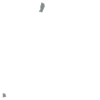

In [13]:
p1=Polygon(poly_features[0]['geometry']['coordinates'][0][0])
p2=Polygon(poly_features[0]['geometry']['coordinates'][2][0])
ppart=shapely.ops.cascaded_union([p1, p2])
ppart

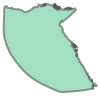

In [14]:
shapely.ops.cascaded_union([Polygon(x[0]) for x in poly_features[0]['geometry']['coordinates']])

In [15]:
len(poly_features[1]['geometry']['coordinates'])

3

In [16]:
len(poly_features[0]['geometry']['coordinates'])

101

In [17]:
def count_list(l):
    count = 0
    for e in l:
        if isinstance(e, list):
            count = max(count, 1 + count_list(e))
    return count

In [18]:
[count_list(l["geometry"]["coordinates"]) for l in poly_features]

[3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3]

In [19]:
[l["geometry"]["type"] for l in poly_features]

['MultiPolygon',
 'Polygon',
 'MultiPolygon',
 'Polygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'Polygon',
 'MultiPolygon',
 'MultiPolygon',
 'Polygon',
 'Polygon',
 'MultiPolygon',
 'MultiPolygon',
 'Polygon',
 'MultiPolygon',
 'MultiPolygon',
 'Polygon',
 'Polygon',
 'MultiPolygon',
 'Polygon',
 'MultiPolygon',
 'Polygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'Polygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'Polygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon',
 'Polygon',
 'Polygon',
 'Polygon',
 'Polygon',
 'Polygon',
 'MultiPolygon',
 'Polygon',
 'MultiPolygon',
 'MultiPolygon',
 'MultiPolygon']

In [23]:
def parse_coordinates(coord_list):
    return shapely.ops.cascaded_union([Polygon(x) for x in coord_list])

In [24]:
def parse_polygon(polygon_list):
    return parse_coordinates(polygon_list['geometry']['coordinates'])

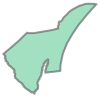

In [25]:
parse_polygon(poly_features[1])

In [26]:
def parse_multipolygon(multi_list):
    return shapely.ops.cascaded_union([parse_coordinates(x) for x in multi_list['geometry']['coordinates']])

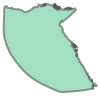

In [27]:
parse_multipolygon(poly_features[0])

In [28]:
poly_final = [] 

for l in poly_features:
    if l["geometry"]["type"] == 'Polygon':
        poly_final.append(parse_polygon(l))
    elif l["geometry"]["type"] == 'MultiPolygon':
        poly_final.append(parse_multipolygon(l))
    else:
        print(l["geometry"]["type"])
        

In [29]:
poly_final[3].contains(shape_points[12])

False

In [30]:
def check_points(point, polygon):
    return polygon.contains(point)

In [31]:
# point_df = pd.DataFrame(data = [i["attributes"]["City_Region"] for i in point_features], columns = ["Name"])

In [32]:
# point_df["Coordinates"] = shape_points

In [41]:
point_df.head()

City/Region        Lat       Long Notes                  Coordinates
0        Actium  38.920000  20.800000   NaN           POINT (20.8 38.92)
1   Alexandrium        NaN        NaN   NaN              POINT (nan nan)
2  Allobrogibus        NaN        NaN   NaN              POINT (nan nan)
3        Alyzia  38.713373  20.951657   NaN  POINT (20.951657 38.713373)
4      Arpinati        NaN        NaN   NaN              POINT (nan nan)

In [42]:
poly_df = pd.DataFrame(data = [i["properties"]["OBJECTID"] for i in poly_features], columns = ["Name"])
poly_df["Polygon"] = poly_final
poly_df.head()

Name                                            Polygon
0     1  (POLYGON ((35.51174926813754 23.60455512958421...
1     2  POLYGON ((37.55652039694426 32.49580620784501,...
2     3  (POLYGON ((21.75424969978516 32.92908434224876...
3     4  POLYGON ((34.59791571163966 35.69950145674842,...
4     5  (POLYGON ((24.08988872405444 34.87752851119745...

In [49]:
check_dict = {}

for i in range(len(point_df['Coordinates'].tolist())):
    for j in range(len(poly_df['Polygon'].tolist())):
        if check_points(point_df['Coordinates'][i], poly_df['Polygon'][j]):
            check_dict[point_df['City/Region'][i]] = (poly_df['Name'][j])#,poly_df['Polygon'][j])

In [50]:
point_poly = pd.DataFrame.from_dict(check_dict.items())

In [51]:
point_poly.rename(columns = {0:'Point',1:'Polygon ID'})

Point  Polygon ID
0        Actium          29
1        Alyzia          29
2        Athens          20
3    Brindisium          37
4    Brundisium          37
5      Campania          37
6         Capua          37
7       Cilicia          19
8       Corcyra          29
9       Corduba          16
10       Cyprum           4
11      Dertona          42
12  Dyrrhachium          29
13     Eporedia          42
14      Iconium          18
15     Lanuvium          37
16     Laterium          37
17     Laudicea          38
18    Menturnis          37
19  Mopsuhestia          10
20     Mytilens          38
21       Narona          40
22        Parma          42
23        Patra          20
24        Perga           6
25  Pindenessus          10
26  Pindenissus          10
27    Pollentia          42
28       Regium          37
29      Sicilia          17
30        Sidae          29
31        Syria          19
32   Tusculanum          10
33        Velia          37

In [44]:
point_poly.to_csv('loc_to_topo_id.csv', index=True)